(60000, 28, 28)
(10000, 28, 28)


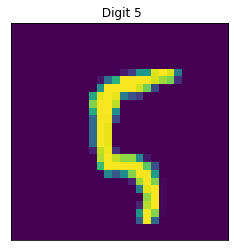

0 255


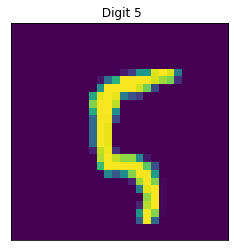

0.0 1.0


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_rows, img_col = 28, 28
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape) 
print(test_images.shape) 

train_images = train_images.reshape(train_images.shape[0], img_rows, img_col, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_col, 1)
input_shape = (img_rows, img_col, 1) 

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_images[3000:]=255-train_images[3000:] 

train_images = train_images.astype('float32') 
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

epochs = 15
model = Sequential()

model.add(Flatten(input_shape = input_shape))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = epochs, shuffle = True)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

NameError: name 'input_shape' is not defined

0.043137256
0.78039217
(1, 28, 28, 1)
3


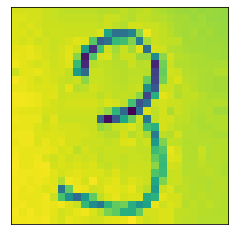

[[0.00113525 0.15303472 0.04732049 0.4688633  0.00594499 0.0018671
  0.00054032 0.15315649 0.00981801 0.15831931]]


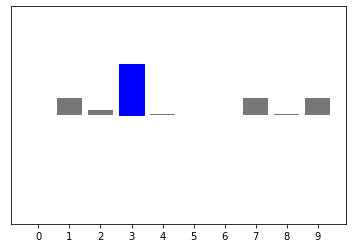

In [3]:
from keras.preprocessing import image
from PIL import Image,ImageChops 

def predict_image(x):
  x = x.astype('float32')
  x = x / 255.0

  print(np.min(x))
  print(np.max(x))

  # images = np.vstack([x])
  # print(images.shape)

  x = np.expand_dims(x, axis=0)
  print(x.shape)

  # x.reshape(0, 28, 28, 1)
  # print(x.shape)
  image_predict = model.predict(x, verbose=0)

  print(np.argmax(image_predict))

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
  
  print(image_predict)
  return image_predict


def plot_value_array(predictions_array, true_label):
  # true_label = true_label[0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([-1, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()
    
path = "test3w.jpg"
img = image.load_img(path, target_size = (28, 28), color_mode = "grayscale")
img_arr = image.img_to_array(img)
arr = predict_image(img_arr)
plot_value_array(arr, 3)